# Installing library

# Q-Learning Table Introduction

In [ ]:
import gymnasium as gym
import numpy as np

env = gym.make("MountainCar-v0", render_mode='human')


learning_rate = 0.1
discount = 0.95
episodes = 25000
show_every = 2000

epsilon = 0.5
start_epsilon_decay = 1
end_epsilon_decay = episodes // 2

epsilon_decay_value = (epsilon/(end_epsilon_decay - start_epsilon_decay))


# print(env.observation_space.high)
# print(env.observation_space.low)
# print(env.action_space)



DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE


q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))


print(env.observation_space.low)
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(int))

for episode in range(episodes):
    print(f"The current number of episodes : {episode}")
    if episode % show_every == 0:
        render = True
    else:
        render = False

    state, info = env.reset()
    discrete_state = get_discrete_state(state)
    done = False

    while not done:
        action = np.argmax(q_table[discrete_state])
        new_state, reward, done, trun_, info = env.step(action)

        new_discrete_state = get_discrete_state(new_state)
        if render:
            env.render()
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]
            new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount * max_future_q)
            q_table[discrete_state+(action, )] = new_q
        elif new_state[0] >= env.unwrapped.goal_position:
            print(f"We made it episode {episode}")
            q_table[discrete_state + (action, )] = 0

        discrete_state = new_discrete_state

    if end_epsilon_decay >= epsilon >= start_epsilon_decay:
        epsilon -= epsilon_decay_value

env.close()

[-1.2  -0.07]
The current number of episodes : 0


2024-11-10 01:11:48.483 Python[54245:2307203] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-10 01:11:48.483 Python[54245:2307203] +[IMKInputSession subclass]: chose IMKInputSession_Modern


We made it episode 0
The current number of episodes : 1
We made it episode 1
The current number of episodes : 2
We made it episode 2
The current number of episodes : 3


KeyboardInterrupt: 

: 

[-1.2  -0.07]
The current number of episodes: 0
Episode: 0, Epsilon: 0.1
The current number of episodes: 1
The current number of episodes: 2
The current number of episodes: 3
The current number of episodes: 4
The current number of episodes: 5
The current number of episodes: 6
The current number of episodes: 7
The current number of episodes: 8
The current number of episodes: 9
The current number of episodes: 10
The current number of episodes: 11
The current number of episodes: 12
The current number of episodes: 13
The current number of episodes: 14
The current number of episodes: 15
The current number of episodes: 16
The current number of episodes: 17
The current number of episodes: 18
The current number of episodes: 19
The current number of episodes: 20
The current number of episodes: 21
The current number of episodes: 22
The current number of episodes: 23
The current number of episodes: 24
The current number of episodes: 25
The current number of episodes: 26
The current number of epis

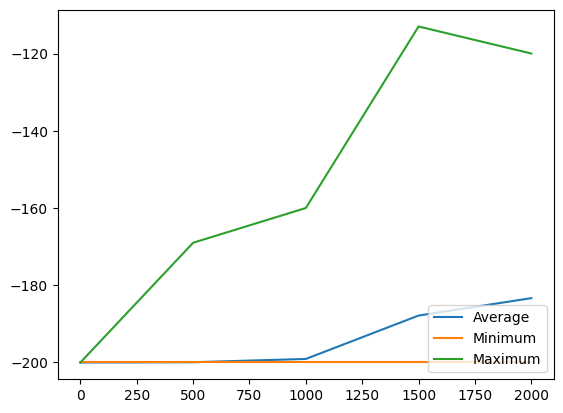

: 

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0", render_mode='human')

learning_rate = 0.1
discount = 0.95
episodes = 2500
show_every = 500

epsilon = 0.1
start_epsilon_decay = 1
end_epsilon_decay = episodes // 2

epsilon_decay_value = epsilon / (end_epsilon_decay - start_epsilon_decay)

DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / DISCRETE_OS_SIZE

q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

episodes_rewards = []

aggr_ap_rewards = {'ep': [], 'avg':[], 'min': [], 'max': []}

print(env.observation_space.low)

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(int))

for episode in range(episodes):
    episode_reward = 0
    print(f"The current number of episodes: {episode}")
    if episode % show_every == 0:
        render = True
        print(f"Episode: {episode}, Epsilon: {epsilon}")
    else:
        render = False

    state, info = env.reset()
    discrete_state = get_discrete_state(state)
    done = False

    while not done:
        # Implement epsilon-greedy action selection
        if np.random.random() > epsilon:
            # Exploit: select the best-known action
            action = np.argmax(q_table[discrete_state])
        else:
            # Explore: select a random action
            action = np.random.randint(0, env.action_space.n)

        # Correctly unpack the step function's return values
        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Collecting reward for each episode
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if render:
            env.render()

        # Q-learning algorithm
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]
            # Standard Q-learning update rule
            new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount * max_future_q)
            # Update Q-value for the current state-action pair
            q_table[discrete_state + (action, )] = new_q
        elif new_state[0] >= env.unwrapped.goal_position:
            print(f"We made it on episode {episode}")
            # Set Q-value to zero if goal is reached
            q_table[discrete_state + (action, )] = 0

        discrete_state = new_discrete_state

    # Epsilon decay
    if end_epsilon_decay >= episode >= start_epsilon_decay:
        epsilon -= epsilon_decay_value
        epsilon = max(epsilon, 0)

    episodes_rewards.append(episode_reward) # Adding total reward

    if not episode % show_every:
        average_reward = sum(episodes_rewards[-show_every:])/len(episodes_rewards[-show_every:])
        aggr_ap_rewards['ep'].append(episode)
        aggr_ap_rewards['avg'].append(average_reward)
        aggr_ap_rewards['min'].append(min(episodes_rewards[-show_every:]))
        aggr_ap_rewards['max'].append(max(episodes_rewards[-show_every:]))
env.close()
plt.plot(aggr_ap_rewards['ep'], aggr_ap_rewards['avg'], label='Average')
plt.plot(aggr_ap_rewards['ep'], aggr_ap_rewards['min'], label='Minimum')
plt.plot(aggr_ap_rewards['ep'], aggr_ap_rewards['max'], label='Maximum')
plt.legend(loc=4)
plt.show()


# Using DQN

In [1]:
import gymnasium as gym
import numpy as np
import os
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.logger import configure

# Set up a fixed number of episodes
total_episodes = 2000
max_timesteps_per_episode = 200  # Max timesteps in MountainCar-v0

# Set up log directories
log_dir = "./logs/"
os.makedirs(log_dir, exist_ok=True)

# Initialize the environment with Monitor for tracking
env = gym.make("MountainCar-v0")
env = Monitor(env, log_dir)  # Monitor helps record rewards and episode lengths

# Custom callback to track progress
class RewardTrackingCallback(BaseCallback):
    def __init__(self, verbose=1):
        super(RewardTrackingCallback, self).__init__(verbose)
        self.episodes_rewards = []
        self.show_every = 500  # Show reward every 500 episodes

    def _on_step(self):
        # Check if an episode is done
        done = self.locals['done']
        if done:
            episode_reward = self.locals['infos'][0]['episode']['r']  # Fetch episode reward from Monitor
            self.episodes_rewards.append(episode_reward)
            
            # Print stats every `show_every` episodes
            if len(self.episodes_rewards) % self.show_every == 0:
                avg_reward = np.mean(self.episodes_rewards[-self.show_every:])
                min_reward = np.min(self.episodes_rewards[-self.show_every:])
                max_reward = np.max(self.episodes_rewards[-self.show_every:])
                print(f"Episode: {len(self.episodes_rewards)}, avg: {avg_reward}, min: {min_reward}, max: {max_reward}")
        return True

# Define the callback
reward_callback = RewardTrackingCallback()

# Configure TensorBoard logging
tensorboard_log_dir = "./dqn_tensorboard/"
new_logger = configure(tensorboard_log_dir, ["stdout", "tensorboard"])

# Create the DQN model
model = DQN(
    "MlpPolicy",
    env,
    learning_rate=0.01,
    gamma=0.99,
    exploration_fraction=0.1,
    exploration_final_eps=0.01,
    verbose=1,
    tensorboard_log=tensorboard_log_dir
)

# Set logger
model.set_logger(new_logger)

# Calculate the total timesteps based on episodes and max timesteps per episode
total_timesteps = total_episodes * max_timesteps_per_episode

# Train the model
model.learn(total_timesteps=total_timesteps, callback=reward_callback)

# Close the environment
env.close()



Logging to ./dqn_tensorboard/
Using cpu device
Wrapping the env in a DummyVecEnv.


KeyError: 'done'

In [7]:
import tensorboard